In [ ]:
#Our project is two steps:
#1. Detect if a given package has suspicious activity (a peak or a step in downloads)
#2. Determine whether that suspicious activity can be explained.

#Step 1 is doing the "magic math" and stuff on our pkg_list. (Already completed, but needs further validation)

#Step 2 has many parts. 
#2.1 Was the package added or dropped as a dependency on a popular project around the time of the rise/ fall of downloads? (Next step)
#2.2 Did any dependents have a similar rise/ fall in downloads? (In progress, but is proving very unreliable so may be dropped). 
#2.2 is probably as far as we will be able to make it, but we can discuss further steps in our presentation
#2.3 Did any developer/ nightly builds have our package as a dependency? 
#2.4 Did a new version release that correlates to increased downloads?
#Etc

In [1]:
import gzip, json
with gzip.open('/data/NPMvulnerabilities/NPMPackages.json.gz', 'rb') as f:
    fc = f.read().decode("utf-8")
from json import JSONDecoder, JSONDecodeError
import re

NOT_WHITESPACE = re.compile(r'[^\s]')

def decode_stacked(document, pos=0, decoder=JSONDecoder()):
    while True:
        match = NOT_WHITESPACE.search(document, pos)
        if not match:
            return
        pos = match.start()

        try:
            obj, pos = decoder.raw_decode(document, pos)
        except JSONDecodeError:
            # do something sensible if there's some error
            print("DECODE_STACKED() FAILED")
            pass
        yield obj

In [165]:
#, 'user-info', 'exec-file-sync', 'babylon-walk', 'speedtest-net', 'dns-then', 'node-then', '@babel/polyfill', '@babel/runtime', 'dvp-mongomodels', '@babel/helper-builder-react-jsx', 'doofinder', 'highland-errors-to', 'highland-process', '@cnbritain/merlin-www-section-card-list', '@cnbritain/merlin-www-tag-header', '@cnbritain/merlin-www-card-list', '@cnbritain/merlin-www-top-stories', 'uapi-json', '@beisen/ethos', '@cnbritain/merlin-www-card', '@babel/helper-replace-supers', 'bfj-node4', 'highland-errors-to', 'highland-process', '@particles/spinner', 'cli-ngy', '@cnbritain/merlin-www-card', 'neutrino-middleware-named-modules', 'chrome-pool', '@cnbritain/merlin-www-topic-strip', 'awayjs-display', '@babel/helper-replace-supers', 'cloudcms-server', 'authenticator-cli', 'authenticator', 'bfj-node4', 'chrome-runner', 'pino-toke', 'stencila', 'sqlite3-transactions', 'domotz-ip-address', 'authenticator-cli', 'safe-regex', 'easynode', 'authenticator', 'p-map-series', 'chunky-stream', 'expresser', 'semver-intersect', 'webpack-cli'


#declare the list of packages that we care about
white_pkgs = ['ajv-keywords', 'htmlnano', 'object.map', 'babylon-walk', 'wix-style-react', 'threads', 'cloudscraper', 'user-info', 'exec-file-sync', 'babylon-walk', 'speedtest-net', 'dns-then', 'node-then', 'doofinder', 'highland-errors-to', 'highland-process', 'highland-errors-to', 'highland-process', 'chrome-pool', 'awayjs-display', 'cloudcms-server', 'authenticator-cli', 'authenticator', 'chrome-runner', 'pino-toke', 'domotz-ip-address', 'authenticator-cli', 'safe-regex', 'authenticator', 'p-map-series', 'semver-intersect']


In [2]:
#build list of dependents per package
#pkgs = ['object.map', 'babylon-walk', 'wix-style-react', 'threads', 'minimist-options', 'lead', '@babel/polyfill', '@babel/helper-define-map', 'cloudscraper']#, 'user-info', 'exec-file-sync', 'babylon-walk', 'speedtest-net', 'dns-then', 'node-then', '@babel/polyfill', '@babel/runtime', 'dvp-mongomodels', '@babel/helper-builder-react-jsx', 'doofinder', 'highland-errors-to', 'highland-process', '@cnbritain/merlin-www-section-card-list', '@cnbritain/merlin-www-tag-header', '@cnbritain/merlin-www-card-list', '@cnbritain/merlin-www-top-stories', 'uapi-json', '@beisen/ethos', '@cnbritain/merlin-www-card', '@babel/helper-replace-supers', 'bfj-node4', 'highland-errors-to', 'highland-process', '@particles/spinner', 'cli-ngy', '@cnbritain/merlin-www-card', 'neutrino-middleware-named-modules', 'chrome-pool', '@cnbritain/merlin-www-topic-strip', 'awayjs-display', '@babel/helper-replace-supers', 'cloudcms-server', 'authenticator-cli', 'authenticator', 'bfj-node4', 'chrome-runner', 'pino-toke', 'stencila', 'sqlite3-transactions', 'domotz-ip-address', 'authenticator-cli', 'safe-regex', 'easynode', 'authenticator', 'p-map-series', 'chunky-stream', 'expresser', 'semver-intersect', 'webpack-cli']
pkgs = ['user-info', 'exec-file-sync', 'babylon-walk', 'speedtest-net', 'dns-then', 'node-then', '@babel/polyfill', '@babel/runtime', 'dvp-mongomodels', '@babel/helper-builder-react-jsx', 'doofinder', 'highland-errors-to', 'highland-process', '@cnbritain/merlin-www-section-card-list', '@cnbritain/merlin-www-tag-header', '@cnbritain/merlin-www-card-list', '@cnbritain/merlin-www-top-stories', 'uapi-json', '@beisen/ethos', '@cnbritain/merlin-www-card', '@babel/helper-replace-supers', 'bfj-node4', 'highland-errors-to', 'highland-process', '@particles/spinner', 'cli-ngy', '@cnbritain/merlin-www-card', 'neutrino-middleware-named-modules', 'chrome-pool', '@cnbritain/merlin-www-topic-strip', 'awayjs-display', '@babel/helper-replace-supers', 'cloudcms-server', 'authenticator-cli', 'authenticator', 'bfj-node4', 'chrome-runner', 'pino-toke', 'stencila', 'sqlite3-transactions', 'domotz-ip-address', 'authenticator-cli', 'safe-regex', 'easynode', 'authenticator', 'p-map-series', 'chunky-stream', 'expresser', 'semver-intersect', 'webpack-cli']
#pkgs = ['ajv-keywords', 'htmlnano']   
dependent = {}
for pkg in pkgs:
    dependent[pkg] = []
    for obj in decode_stacked(fc):
        ind = 0
        try: versions = list(obj['versions'].keys())
        except: continue
        try: release_dates = obj['time']
        except: continue
        info = {key: {'release_date': release_dates[key]} for key in release_dates if key not in ['created', 'modified']}
        for key in versions:
            try:
                info[key]['dependencies'] = list(obj['versions'][key]['dependencies'].keys())
                if pkg in info[key]['dependencies']: ind = 1
            except: continue
        if ind :
            dependent[pkg].append(obj['name'])

In [36]:
#insert dependent list into database
import pymongo


dbname = "NPMvulnerabilities"
collname = "dependents"
client = pymongo.MongoClient("da1.eecs.utk.edu")

db = client[dbname]
coll = db[collname]

for k in dependent.keys():
    coll.insert_one({'name': k, 'dep': dependent[k]})

In [37]:
#example code for printing all dependency lists
import pymongo


dbname = "NPMvulnerabilities"
collname = "dependents"
client = pymongo.MongoClient("da1.eecs.utk.edu")

db = client[dbname]
coll = db[collname]

for r in coll.find():
    print(r['name'])
    print(r['dep'])

ajv-keywords
['jsonscript-proxy', 'senasaikou-yeoman', 'webpack-egoist', 'alex-d.js', 'advanced-image-loader', 'webpack-addons-ylvis', 'primeng-custom', 'jicli', '@lgeiger/electron-builder', '@touched/map-tool-project', 'generator-arc', 'node-private-tools', 'fhir2', 'webpack-ie8', 'mocoolka-tools', 'misstep', '@cysonius/schema-utils', 'ng2-dnd-kokatsuna', 'qweb-client', '@johnf/electron-builder', 'qor', 'json-framework', 'hy-checkbox', 'babel-plugin-react-native-css', 'webpack-universal', 'babel-plugin-react-css-modules-avion', 'general-req', '@ngxvoice/ngx-voicelistner', 'electron-builder-admin', 'iqm', 'freemamba', 'isomorphic-webpack', 'webpack-tal', 'search-list-react', 'sea-floor', 'carousel-react', 'nicholas_util', 'search-input-react', 'json-injector', 'es-webpack', '@frctl/support', 'ajv-interface-keywords', 'stygian', 'lrbceshi', 'gh-lint', '@jose_santacruz/middy', '@ddder/webpack', 'vbot', 'outils-ren', 'canvas-fingerprint', 'firebase-forum', 'firebase-feedback', 'egeria-mer

In [146]:
#Build collection of weekly download data per package
import time, requests, sys, pymongo, json, datetime

#Database initilization stuff
dbname = "NPMvulnerabilities"
collname = "pkg_dl"
client = pymongo.MongoClient("da1.eecs.utk.edu")

db = client[dbname]
coll = db[collname]

#pkgs = ['ajv-keywords', 'htmlnano']
#pkgs = ['htmlnano']
pkgs = ['user-info', 'exec-file-sync', 'babylon-walk', 'speedtest-net', 'dns-then', 'node-then', '@babel/polyfill', '@babel/runtime', 'dvp-mongomodels', '@babel/helper-builder-react-jsx', 'doofinder', 'highland-errors-to', 'highland-process', '@cnbritain/merlin-www-section-card-list', '@cnbritain/merlin-www-tag-header', '@cnbritain/merlin-www-card-list', '@cnbritain/merlin-www-top-stories', 'uapi-json', '@beisen/ethos', '@cnbritain/merlin-www-card', '@babel/helper-replace-supers', 'bfj-node4', 'highland-errors-to', 'highland-process', '@particles/spinner', 'cli-ngy', '@cnbritain/merlin-www-card', 'neutrino-middleware-named-modules', 'chrome-pool', '@cnbritain/merlin-www-topic-strip', 'awayjs-display', '@babel/helper-replace-supers', 'cloudcms-server', 'authenticator-cli', 'authenticator', 'bfj-node4', 'chrome-runner', 'pino-toke', 'stencila', 'sqlite3-transactions', 'domotz-ip-address', 'authenticator-cli', 'safe-regex', 'easynode', 'authenticator', 'p-map-series', 'chunky-stream', 'expresser', 'semver-intersect', 'webpack-cli']

#Build list of dates we care about
start_date = datetime.datetime(2015, 3, 5) #start date
delta = datetime.timedelta(days=6) #length of time cared about 
end_date = start_date + delta #start date + delta = 7 days = 1 week
dt_range = [] #empty list to shove weeks in
final_date = datetime.datetime(2018, 10, 3) #end date

while start_date < final_date: #build list of weeks from start_date to final_date in dt_range
    if end_date > final_date : end_date = final_date
    dt_range.append((start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d')))
    start_date = end_date + datetime.timedelta(days=1)
    end_date = start_date + delta


# get data
base_url = 'https://api.npmjs.org/downloads/point/'
l = len(pkgs)
print(l)
for pkg in pkgs: #For each package
    dl = [] #Empty download list
    for r in dt_range: #For each week in dt_range
        #Use the NPMjs API to try and grab download data for that week
        url = base_url+r[0]+':'+r[1]+'/'+pkg
        try: r = requests.get(url)
        except: print('Timeout '+ pkg+'\n')
        
        #Build data
        try:
            result = r.content
            try:
                rj = json.loads(result.decode('utf-8', errors='ignore')) #rj has weekly downloads, name, start date, and end date
                rj.pop('package', None) #remove package name from rj since we already have it
                
                #basic data cleaning to remove all weeks that contained downtime. 
                if(rj['start'] != '2018-05-24' and rj['start'] != '2018-05-31' and rj['start'] != '2018-08-02' and rj['start'] != '2018-08-23'):
                    dl = dl + [rj] #Put rj (current week's data) into our list of weeks
            except: print('DecodeError '+ pkg+'\n')
        except: print('BadURL '+ pkg+'\n')
    #ent = {pkg: dl}    
    ent = {'name':pkg, 'dl': dl} #Build an association between package name and its weekly download data

    coll.insert_one(ent) #shove the data into the database
    #print(ent)

50
DecodeError dns-then



In [69]:
import time, requests, sys, pymongo, json, datetime


dbname = "NPMvulnerabilities"
collname = "dep_dl"
client = pymongo.MongoClient("da1.eecs.utk.edu")

db = client[dbname]
coll = db[collname]

#pkgs = ['ajv-keywords', 'htmlnano']
start_date = datetime.datetime(2015, 3, 1)
delta = datetime.timedelta(days=6)
end_date = start_date + delta
dt_range = []
final_date = datetime.datetime(2018, 10, 1)

while start_date < final_date:
    if end_date > final_date : end_date = final_date
    dt_range.append((start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d')))
    start_date = end_date + datetime.timedelta(days=1)
    end_date = start_date + delta


# get data
base_url = 'https://api.npmjs.org/downloads/point/'
l = len(pkgs)
print(l)
for k in dependent.keys():
    for i in dependent[k]:
        dl = []
        for r in dt_range:
            url = base_url+r[0]+':'+r[1]+'/'+i
            try: r = requests.get(url)
            except: print('Timeout '+ i+'\n')
        
            try:
                result = r.content
                try:
                    rj = json.loads(result.decode('utf-8', errors='ignore'))
                    rj.pop('package', None)
                    dl = dl + [rj]
                except: print('DecodeError '+ i+'\n')
            except: print('BadURL '+ i+'\n')
        #ent = {pkg: dl}    
        ent = {'name':i, 'dl': dl}
        coll.insert_one(ent)
        print(ent)

1


TypeError: Can't convert 'set' object to str implicitly

In [166]:
#Rise/ fall detection
import math, time, requests, sys, pymongo, json, datetime

#database initilization stuff
dbname = "NPMvulnerabilities"
collname = "pkg_dl"
client = pymongo.MongoClient("da1.eecs.utk.edu")

db = client[dbname]
coll = db[collname]


rise_list = {} #Empty dictionary of significant rises
fall_list = {} #Empty dictionary of significant falls
for r in coll.find(): #for each package in our collection
    #if package isn't in our list of packages we care about, skip it
    if not r['name'] in white_pkgs: 
        continue
        
    print("for package " + r['name'] + ":")
    download_list = []
    start_date = []
    rise_list[r['name']] = []
    fall_list[r['name']] = []
    ent = r['dl']
    for k in ent:
        download_list.append(k["downloads"])
        start_date.append(k["start"])
            
    for x in range(1,len(download_list) -1):
        if download_list[x] > 300: #bots have ~300 downloads per week, so we ignore anything with less than that
            if (download_list[x] > 0) and (download_list[x-1] > 0): #If neither this week nor last week had 0 downloads
                pdif = (download_list[x] - download_list[x-1]) / download_list[x-1] #Take the percentage difference between this week and last week
                if (.3 <= pdif) and ((max(download_list) * .3)  < download_list[x]): 
                    #If %difference is greater than 30%, we have a significant rise
                    #If the number of downloads is at least 30% of our highest ever weekly downloads, this is a significant rise we care about
                    rise_list[r['name']].append(start_date[x]) #Put the date into dictionary at package name
                    print("We have a rise for " + r['name'] + " at " + start_date[x])
                if (-.3 >= pdif) and ((max(download_list) * .3) < download_list[x-1]):
                    #If %difference is less than -30%, we have a significant drop
                    #If last week's number of downloads is at least 30% of our highest ever weekly downloads, this is a significant drop we care about
                    fall_list[r['name']].append(start_date[x]) #Put the date into dictionary at package name
                    print("We have a fall for " + r['name'] + " at " + start_date[x])


for package ajv-keywords:
We have a rise for ajv-keywords at 2018-01-04
for package htmlnano:
We have a rise for htmlnano at 2017-12-21
We have a rise for htmlnano at 2017-12-28
We have a fall for htmlnano at 2018-01-04
for package object.map:
We have a rise for object.map at 2017-12-14
We have a rise for object.map at 2018-01-04
for package babylon-walk:
We have a rise for babylon-walk at 2017-12-21
We have a rise for babylon-walk at 2017-12-28
We have a fall for babylon-walk at 2018-01-04
for package wix-style-react:
We have a rise for wix-style-react at 2018-05-03
We have a fall for wix-style-react at 2018-05-10
for package threads:
We have a rise for threads at 2017-12-21
We have a fall for threads at 2018-01-04
for package cloudscraper:
We have a rise for cloudscraper at 2017-12-21
We have a fall for cloudscraper at 2018-01-04
for package user-info:
We have a rise for user-info at 2018-01-04
We have a rise for user-info at 2018-07-12
for package exec-file-sync:
We have a rise for 

In [167]:
#example code for printing rise_list and fall_list
for r in rise_list:
    #print("We have rises for " + r + " at " + str(rise_list[r]))
    for m in rise_list[r]:
        #print("We have a rise for " + r + " at " + m)
        print(r + ", " + m + ", " + "rise")
        
for r in fall_list:
    #print("We have falls for " + r + " at " + str(fall_list[r]))
    for m in fall_list[r]:
        print(r + ", " + m + ", " + "fall")

safe-regex, 2018-02-22, rise
highland-errors-to, 2018-01-11, rise
highland-errors-to, 2018-03-29, rise
highland-errors-to, 2018-07-12, rise
cloudscraper, 2017-12-21, rise
ajv-keywords, 2018-01-04, rise
wix-style-react, 2018-05-03, rise
babylon-walk, 2017-12-21, rise
babylon-walk, 2017-12-28, rise
awayjs-display, 2018-02-22, rise
node-then, 2017-12-21, rise
chrome-runner, 2018-02-01, rise
chrome-runner, 2018-02-22, rise
semver-intersect, 2018-02-15, rise
authenticator, 2018-02-08, rise
authenticator, 2018-02-15, rise
authenticator, 2018-03-22, rise
chrome-pool, 2018-02-22, rise
exec-file-sync, 2015-08-20, rise
p-map-series, 2018-09-20, rise
user-info, 2018-01-04, rise
user-info, 2018-07-12, rise
highland-process, 2018-01-11, rise
highland-process, 2018-03-29, rise
highland-process, 2018-07-12, rise
pino-toke, 2017-10-26, rise
pino-toke, 2017-11-09, rise
pino-toke, 2018-02-22, rise
pino-toke, 2018-03-08, rise
pino-toke, 2018-03-29, rise
pino-toke, 2018-04-19, rise
pino-toke, 2018-05-10, 

In [168]:
#Gets dependent list with version history
dbname = "NPMvulnerabilities"
collname = "pkg_dl"
client = pymongo.MongoClient("da1.eecs.utk.edu")

db = client[dbname]
coll = db[collname]

dependent1 = {}
for r in coll.find():
    if not r['name'] in white_pkgs: 
        continue
    
    pkg = r['name']
    dependent1[pkg] = []   
    for obj in decode_stacked(fc):
        ind = 0
        try: versions = list(obj['versions'].keys())
        except: continue
        try: release_dates = obj['time']
        except: continue
        info = {key: {'release_date': release_dates[key]} for key in release_dates if key not in ['created', 'modified']}
        for key in versions:
            try:
                info[key]['dependencies'] = list(obj['versions'][key]['dependencies'].keys())
                if pkg in info[key]['dependencies']: ind = 1
            except: continue
        if ind :
            dependent1[pkg].append({obj['name']: info})

In [174]:
for k in dependent1.keys():
    print(k)
    print(dependent1[k][1:2])
    print("len = ", len(dependent1[k]))

safe-regex
[{'ziggy-substitute': {'0.2.2': {'dependencies': ['safe-regex', 'quotemeta'], 'release_date': '2014-05-24T17:10:32.259Z'}, '0.2.1': {'dependencies': ['safe-regex', 'quotemeta'], 'release_date': '2014-05-08T02:55:29.321Z'}, '0.0.0': {'dependencies': ['quotemeta'], 'release_date': '2014-04-18T06:13:01.318Z'}, '0.1.0': {'dependencies': ['quotemeta'], 'release_date': '2014-05-01T05:29:47.764Z'}, '0.3.0': {'dependencies': ['safe-regex', 'quotemeta'], 'release_date': '2014-06-27T15:06:01.846Z'}, '0.2.3': {'dependencies': ['safe-regex', 'quotemeta'], 'release_date': '2014-06-21T16:08:25.936Z'}, '0.2.0': {'dependencies': ['safe-regex', 'quotemeta'], 'release_date': '2014-05-08T02:48:43.412Z'}}}]
len =  54
highland-errors-to
[{'highland-process': {'1.0.0': {'dependencies': ['highland'], 'release_date': '2015-01-06T08:24:06.618Z'}, '1.0.3': {'dependencies': ['highland-errors-to', 'highland'], 'release_date': '2015-02-11T17:31:49.830Z'}, '1.0.1': {'dependencies': ['highland'], 'release

In [172]:
# dict - {target package : [(dependent package, release)]}
from datetime import datetime as dt
delrl = {}
adrl = {}
all_del_deps =[]
for k in dependent1.keys():
    adrl[k] = [] #list of all versions with dependent where previous version did not have it
    delrl[k] = [] #list of all version without dependent where previous version did have it
    for l in dependent1[k]:
        d = list(l.keys())[0]
        #print(k + ' : ' + d)
        v = l[d]
        rdt_l = {}


        for rk in v.keys():
            r = v[rk]

            rdt = r['release_date'][:10]+' '+r['release_date'][11:19]
            rdt = dt.strptime(rdt , "%Y-%m-%d %H:%M:%S")
            try:
                if k in r['dependencies']: rdt_l[rdt] = ['Y',rk]
                else: rdt_l[rdt] = ['N', rk]
            except:
                continue

        rdt_s = sorted(rdt_l.keys())
        fadd = 0

        for r in rdt_s:
            if fadd == 0 and rdt_l[r][0] == 'Y':
                if r.date() < dt(2015,3,1).date(): t = dt(2015,3,1).date()
                else: t = r.date()
                adrl[k].append([d,  rdt_l[r][1], str(r)])
                print("add: " + k + ' : ' + d + ' ' + rdt_l[r][1] + ' ' + str(r))
                fadd = 1
            if fadd and rdt_l[r][0] == 'N':
                if r.date() < dt(2015,3,1).date(): t = dt(2015,3,1).date()
                else: t = r.date()
                delrl[k].append([d, rdt_l[r][1], str(r)])
                print("drop: " + k + ' : ' + d + ' ' + rdt_l[r][1] + ' ' + str(r))
                all_del_deps.append(d)
                fadd = 0

add: safe-regex : level-search 1.5.0 2013-07-13 06:50:45
add: safe-regex : ziggy-substitute 0.2.0 2014-05-08 02:48:43
add: safe-regex : grunt-fasec 0.1.0 2015-03-25 02:36:44
add: safe-regex : eslint-plugin-safe-regex 1.0.0 2015-04-18 02:38:35
add: safe-regex : sublayer 0.0.1 2015-08-12 03:04:47
add: safe-regex : regex-arg 1.0.0 2015-05-20 17:17:25
add: safe-regex : eslint-plugin-no-unsafe-regex 0.0.0 2015-09-17 19:36:21
add: safe-regex : eslint-plugin-fasec 0.1.1 2015-03-19 20:50:17
add: safe-regex : eslint-plugin-inster 1.0.7 2015-11-18 15:21:23
add: safe-regex : redos 1.0.0 2016-06-02 01:10:08
add: safe-regex : regex-safer 0.0.1 2016-09-16 18:50:34
add: safe-regex : agraddy.smtp.router 0.2.0 2017-01-02 06:46:23
add: safe-regex : workers-factory-rebuild 1.1.2 2017-03-16 03:59:12
add: safe-regex : agraddy.http.router 0.4.0 2017-01-08 04:48:55
add: safe-regex : bip-pod-flow 0.1.2 2014-03-19 00:10:40
add: safe-regex : eslint-plugin-security 1.0.0 2015-11-15 15:03:24
add: safe-regex : hub

add: ajv-keywords : yoshi 3.8.1 2018-08-29 08:36:53
add: ajv-keywords : skhema 1.0.0 2018-06-25 23:00:16
add: ajv-keywords : @syncano/validate 0.10.0 2018-03-08 18:48:37
add: ajv-keywords : ylztest 0.0.1 2018-09-07 08:34:13
drop: ajv-keywords : ylztest 1.0.2 2018-09-07 09:13:48
add: ajv-keywords : rendition 4.0.0-beta5 2018-03-29 05:49:40
drop: ajv-keywords : rendition 3.26.1 2018-04-04 13:21:51
add: ajv-keywords : rendition 4.0.0 2018-04-11 14:20:58
drop: ajv-keywords : rendition 3.27.0 2018-05-14 14:28:19
add: ajv-keywords : rendition 4.6.1 2018-05-22 13:40:24
add: ajv-keywords : revolsys-angular-framework 1.0.0-beta.2 2018-03-17 14:14:05
drop: ajv-keywords : revolsys-angular-framework 1.0.0-beta.4 2018-03-27 14:51:10
add: ajv-keywords : @uportal/form-builder 0.1.0 2018-07-11 03:56:57
drop: ajv-keywords : @uportal/form-builder 0.1.2 2018-07-17 16:56:39
add: ajv-keywords : oors-graphql 1.3.0 2017-11-15 19:06:44
drop: ajv-keywords : oors-graphql 2.0.0 2018-06-24 11:32:25
add: ajv-keywo

In [201]:
for k in adrl:
    print('package add dates for ' + k)
    for r in range(0, len(adrl[k])):
        print(adrl[k][r][0])
for k in delrl:
    print('package drop dates for ' + k)
    for r in range(0, len(delrl[k])):
        print(delrl[k][r])

package add dates for safe-regex
level-search
ziggy-substitute
grunt-fasec
eslint-plugin-safe-regex
sublayer
regex-arg
eslint-plugin-no-unsafe-regex
eslint-plugin-fasec
eslint-plugin-inster
redos
regex-safer
agraddy.smtp.router
workers-factory-rebuild
agraddy.http.router
bip-pod-flow
eslint-plugin-security
hubot-lex
mongo-url-utils
safer-regex
regex-not
to-regex
vue-size-tracker
dk_2018_1_1
anyproxy-package-demo
react-native-handcheque-engine
asop
react-redux-demo1
a_react_reflux_demo
react-angular-component
qrelate
jsgrep-cli
react-native-version-manager
v-siema
miguelcostero-ng2-toasty
react-native-modal-animated
tslint-import-rules
workers-factory
xhelper
kasocki
fragments.css
redosy
kafka-sse
carpenterd
anumargak
js-makedepend
maildu-cli
eslint-plugin-unicorn
react-transforming
dependency-cruiser
tslint-config-security
@edenhealth/eve
react-misc-toolbox
renovate
find-my-way
package add dates for highland-errors-to
highland-unix-join
highland-process
package add dates for cloudscrap

In [208]:
for r in rise_list:
    #print("We have rises for " + r + " at " + str(rise_list[r]))
    for m in rise_list[r]:
        temp1 = dt.strptime((str(m) + " 00:00:00"), "%Y-%m-%d %H:%M:%S")
        temp1 = rdt - temp1
        print(rise_list[r])
        #print("Time difference " + str(temp1))
        
#for r in fall_list:
    #print("We have falls for " + r + " at " + str(fall_list[r]))
 #   for m in fall_list[r]:
        #print("We have a fall for " + r + " at " + m)

['2018-02-22']
['2018-01-11', '2018-03-29', '2018-07-12']
['2018-01-11', '2018-03-29', '2018-07-12']
['2018-01-11', '2018-03-29', '2018-07-12']
['2017-12-21']
['2018-01-04']
['2018-05-03']
['2017-12-21', '2017-12-28']
['2017-12-21', '2017-12-28']
['2018-02-22']
['2017-12-21']
['2018-02-01', '2018-02-22']
['2018-02-01', '2018-02-22']
['2018-02-15']
['2018-02-08', '2018-02-15', '2018-03-22']
['2018-02-08', '2018-02-15', '2018-03-22']
['2018-02-08', '2018-02-15', '2018-03-22']
['2018-02-22']
['2015-08-20']
['2018-09-20']
['2018-01-04', '2018-07-12']
['2018-01-04', '2018-07-12']
['2018-01-11', '2018-03-29', '2018-07-12']
['2018-01-11', '2018-03-29', '2018-07-12']
['2018-01-11', '2018-03-29', '2018-07-12']
['2017-10-26', '2017-11-09', '2018-02-22', '2018-03-08', '2018-03-29', '2018-04-19', '2018-05-10', '2018-05-17', '2018-08-16']
['2017-10-26', '2017-11-09', '2018-02-22', '2018-03-08', '2018-03-29', '2018-04-19', '2018-05-10', '2018-05-17', '2018-08-16']
['2017-10-26', '2017-11-09', '2018-

In [217]:
for k in adrl:
    for l in range(0, len(adrl[k])):
        for i in rise_list:
            if not (k == i):
                continue
            for j in rise_list[i]:
                add = dt.strptime((str(adrl[k][l][2])), "%Y-%m-%d %H:%M:%S")
                rise = dt.strptime(j, "%Y-%m-%d")
                dif = rise - add
                #if dif is negative, the dependent was added after the rise
                    #we care about (potentially) up to one week after the rise
                #if dif is positive, the dependent was added before the rise
                #print(dif)
                if ((dif < datetime.timedelta(days=7)) and (dif > datetime.timedelta(days=-4))):
                    print("Rise of " + i + " on " + j + " which cooresponds to add of " + adrl[k][l][0] + " on " + adrl[k][l][2] + " with a time difference of " + str(dif))

Rise of safe-regex on 2018-02-22 which cooresponds to add of regex-not on 2018-02-20 01:49:17 with a time difference of 1 day, 22:10:43
Rise of safe-regex on 2018-02-22 which cooresponds to add of to-regex on 2018-02-24 08:29:32 with a time difference of -3 days, 15:30:28
Rise of safe-regex on 2018-02-22 which cooresponds to add of tslint-config-security on 2018-02-27 15:56:33 with a time difference of -6 days, 8:03:27
Rise of cloudscraper on 2017-12-21 which cooresponds to add of bittrex-rx on 2017-12-19 06:16:06 with a time difference of 1 day, 17:43:54
Rise of ajv-keywords on 2018-01-04 which cooresponds to add of firebase-forum on 2018-01-05 06:21:55 with a time difference of -2 days, 17:38:05
Rise of ajv-keywords on 2018-01-04 which cooresponds to add of firebase-feedback on 2018-01-05 04:27:00 with a time difference of -2 days, 19:33:00
Rise of ajv-keywords on 2018-01-04 which cooresponds to add of egeria-mercurius on 2018-01-05 15:57:39 with a time difference of -2 days, 8:02:21

In [233]:
for k in delrl:
    for l in range(0, len(delrl[k])):
        for i in fall_list:
            if not (k == i):
                continue
            for j in fall_list[i]:
                drop = dt.strptime((str(delrl[k][l][2])), "%Y-%m-%d %H:%M:%S")
                fall = dt.strptime(j, "%Y-%m-%d")
                dif = fall - drop
                #if dif is negative, the dependent was added after the rise
                    #we care about (potentially) up to one week after the rise
                #if dif is positive, the dependent was added before the rise
                #print(dif)
                if ((dif < datetime.timedelta(days=7)) and (dif > datetime.timedelta(days=-4))):
                    print("Fall of " + i + " on " + j + " which cooresponds to removal of " + delrl[k][l][0] + " on " + delrl[k][l][2] + " with a time difference of " + str(dif))

Fall of cloudscraper on 2018-01-04 which cooresponds to removal of egeria on 2018-01-05 16:05:22 with a time difference of -2 days, 7:54:38
Fall of exec-file-sync on 2015-09-03 which cooresponds to removal of os-locale on 2015-09-03 10:31:39 with a time difference of -1 day, 13:28:21


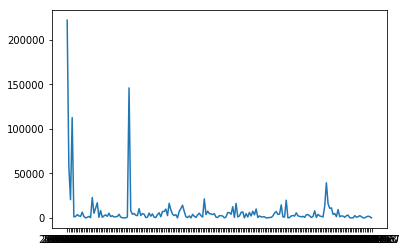

In [232]:
import matplotlib.pyplot as plt

dbname = "NPMvulnerabilities"
collname = "pkg_dl"
client = pymongo.MongoClient("da1.eecs.utk.edu")

db = client[dbname]
coll = db[collname]

r = coll.find_one({'name':'cloudcms-server'})
download_list = []
start_date = []
ent = r['dl']
for k in ent:
    download_list.append(k["downloads"])
    start_date.append(k["start"])
    
    
plt.plot(start_date, download_list)

In [237]:
print(dependent)

{'ajv-keywords': ['jsonscript-proxy', 'senasaikou-yeoman', 'webpack-egoist', 'alex-d.js', 'advanced-image-loader', 'webpack-addons-ylvis', 'primeng-custom', 'jicli', '@lgeiger/electron-builder', '@touched/map-tool-project', 'generator-arc', 'node-private-tools', 'fhir2', 'webpack-ie8', 'mocoolka-tools', 'misstep', '@cysonius/schema-utils', 'ng2-dnd-kokatsuna', 'qweb-client', '@johnf/electron-builder', 'qor', 'json-framework', 'hy-checkbox', 'babel-plugin-react-native-css', 'webpack-universal', 'babel-plugin-react-css-modules-avion', 'general-req', '@ngxvoice/ngx-voicelistner', 'electron-builder-admin', 'iqm', 'freemamba', 'isomorphic-webpack', 'webpack-tal', 'search-list-react', 'sea-floor', 'carousel-react', 'nicholas_util', 'search-input-react', 'json-injector', 'es-webpack', '@frctl/support', 'ajv-interface-keywords', 'stygian', 'lrbceshi', 'gh-lint', '@jose_santacruz/middy', '@ddder/webpack', 'vbot', 'outils-ren', 'canvas-fingerprint', 'firebase-forum', 'firebase-feedback', 'egeria